# Imports

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import pickle
import polars as pl
import pandas as pd
import os
# The data Structure + Helper_Functions 
from src.Helper_Functions import Load_idx_maps ,load_model

# Dimentionality Reduction - PCA for a 30d trait vectors

## Movies Embeddings

In [8]:
experiment_folder = "Experiments_ml-32m/B_U_V_F/"
data_folder = 'Training_data/ml-32m'
# K_factors = 30; lambda_reg = 1 ; gamma = 0.01 ; taw =  10
user_idx_map, movie_idx_map, idx_to_user, idx_to_movie, genre_to_idx, specific_indices = Load_idx_maps(data_folder)
movies_factors,users_factors,user_bias,item_bias,feature_vectors = load_model(experiment_folder)

In [15]:
specific_indices

{'Adventure': [np.int64(415),
  np.int64(191),
  np.int64(1443),
  np.int64(192),
  np.int64(3613),
  np.int64(1444),
  np.int64(2),
  np.int64(5248),
  np.int64(416),
  np.int64(18140),
  np.int64(13094),
  np.int64(3866),
  np.int64(945),
  np.int64(946),
  np.int64(1465),
  np.int64(1466),
  np.int64(1467),
  np.int64(13801),
  np.int64(4180),
  np.int64(8525),
  np.int64(197),
  np.int64(144),
  np.int64(1473),
  np.int64(199),
  np.int64(418),
  np.int64(3912),
  np.int64(419),
  np.int64(201),
  np.int64(10939),
  np.int64(153),
  np.int64(4182),
  np.int64(5349),
  np.int64(15),
  np.int64(203),
  np.int64(204),
  np.int64(1514),
  np.int64(167),
  np.int64(168),
  np.int64(1519),
  np.int64(170),
  np.int64(11783),
  np.int64(6856),
  np.int64(1532),
  np.int64(350),
  np.int64(207),
  np.int64(208),
  np.int64(8846),
  np.int64(426),
  np.int64(1546),
  np.int64(9068),
  np.int64(1547),
  np.int64(209),
  np.int64(4183),
  np.int64(427),
  np.int64(1557),
  np.int64(1568),
  n

In [9]:
def create_idx_to_title(movies_csv_path, movie_idx_map):
    # Load the movies.csv file into a DataFrame
    movies_df = pd.read_csv(movies_csv_path)

    # Ensure columns 'movieId' and 'title' exist in the DataFrame
    if 'movieId' not in movies_df.columns or 'title' not in movies_df.columns:
        raise ValueError("The CSV file must contain 'movieId' and 'title' columns.")

    # Create a mapping from movie_id to title
    movie_id_to_title = dict(zip(movies_df['movieId'], movies_df['title']))

    # Create the idx_to_title dictionary using movie_idx_map

    idx_to_title = {idx: movie_id_to_title[movie_id] for movie_id, idx in movie_idx_map.items() if movie_id in movie_id_to_title}

    return idx_to_title
movies_csv_path = "Data/ml-32m/movies.csv"  # Path to the movies.csv file
idx_to_title = create_idx_to_title(movies_csv_path, movie_idx_map)

/tmp/ipykernel_12083/3544702452.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap(colormap, num_genres)


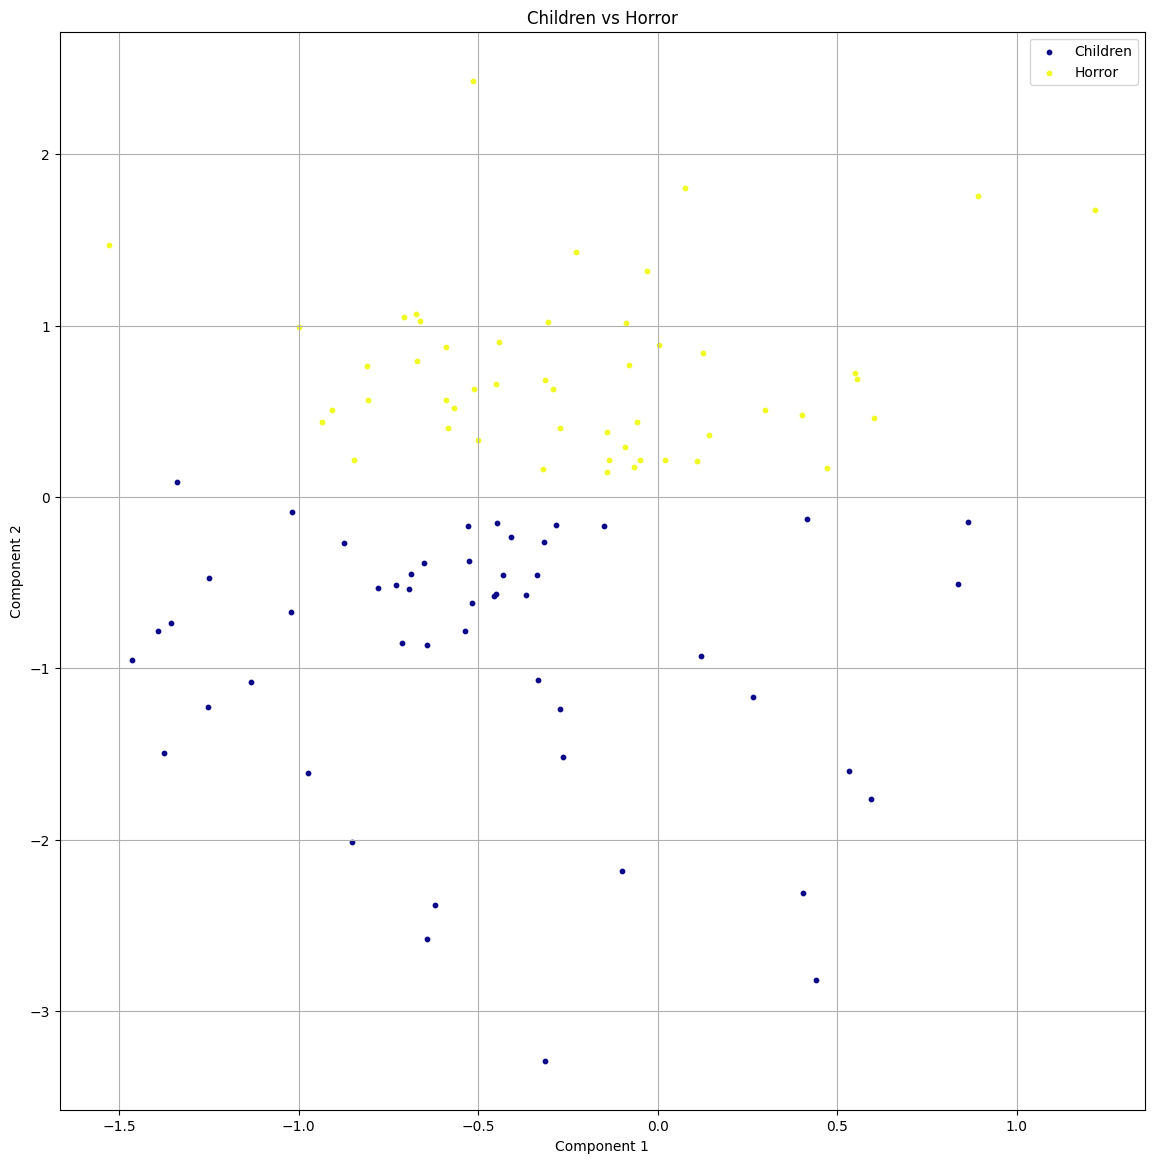

In [10]:
def plot_genre_embeddings(movie_embeddings, specific_indices, genres, colormap='viridis', n_points=100, title="Movie Embeddings Visualization"):

    # Step 1: Dimensionality reduction
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(movie_embeddings)

    # Step 2: Setup the plot and colors
    num_genres = len(genres)
    colors = cm.get_cmap(colormap, num_genres)
    plt.figure(figsize=(14, 14))

    # Step 3: Plot movies by genre
    for genre_idx, genre in enumerate(genres):
        if genre not in specific_indices:
            print(f"Warning: Genre '{genre}' not found in specific indices. Skipping.")
            continue
        color = colors(genre_idx)
        for i in specific_indices[genre][:n_points]:
            x, y = reduced_embeddings[i]
            plt.scatter(x, y, color=color, s=10, label=genre if genre not in plt.gca().get_legend_handles_labels()[1] else "")
            # Optional: Add text for each point (e.g., movie title)
            # plt.text(x, y, fontsize=8)

    # Step 4: Finalize the plot
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_genre_embeddings(movies_factors, specific_indices, ['Children', 'Horror'], colormap='plasma', n_points=50, title="Children vs Horror")


## Features Embeddings

In [15]:
# Step 1: Dimensionality reduction
pca = PCA(n_components=2)
reduced_features_embeddings = pca.fit_transform(feature_vectors)
colormap = 'plasma'
# Step 2: Setup the plot and colors
genres = list(specific_indices.keys())  # List of genres

num_genres = len(genres)
colors = cm.get_cmap(colormap, num_genres)
plt.figure(figsize=(14, 14))
reduced_features_embeddings.shape

/tmp/ipykernel_21958/3417729999.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap(colormap, num_genres)


(19, 2)

<Figure size 1400x1400 with 0 Axes>

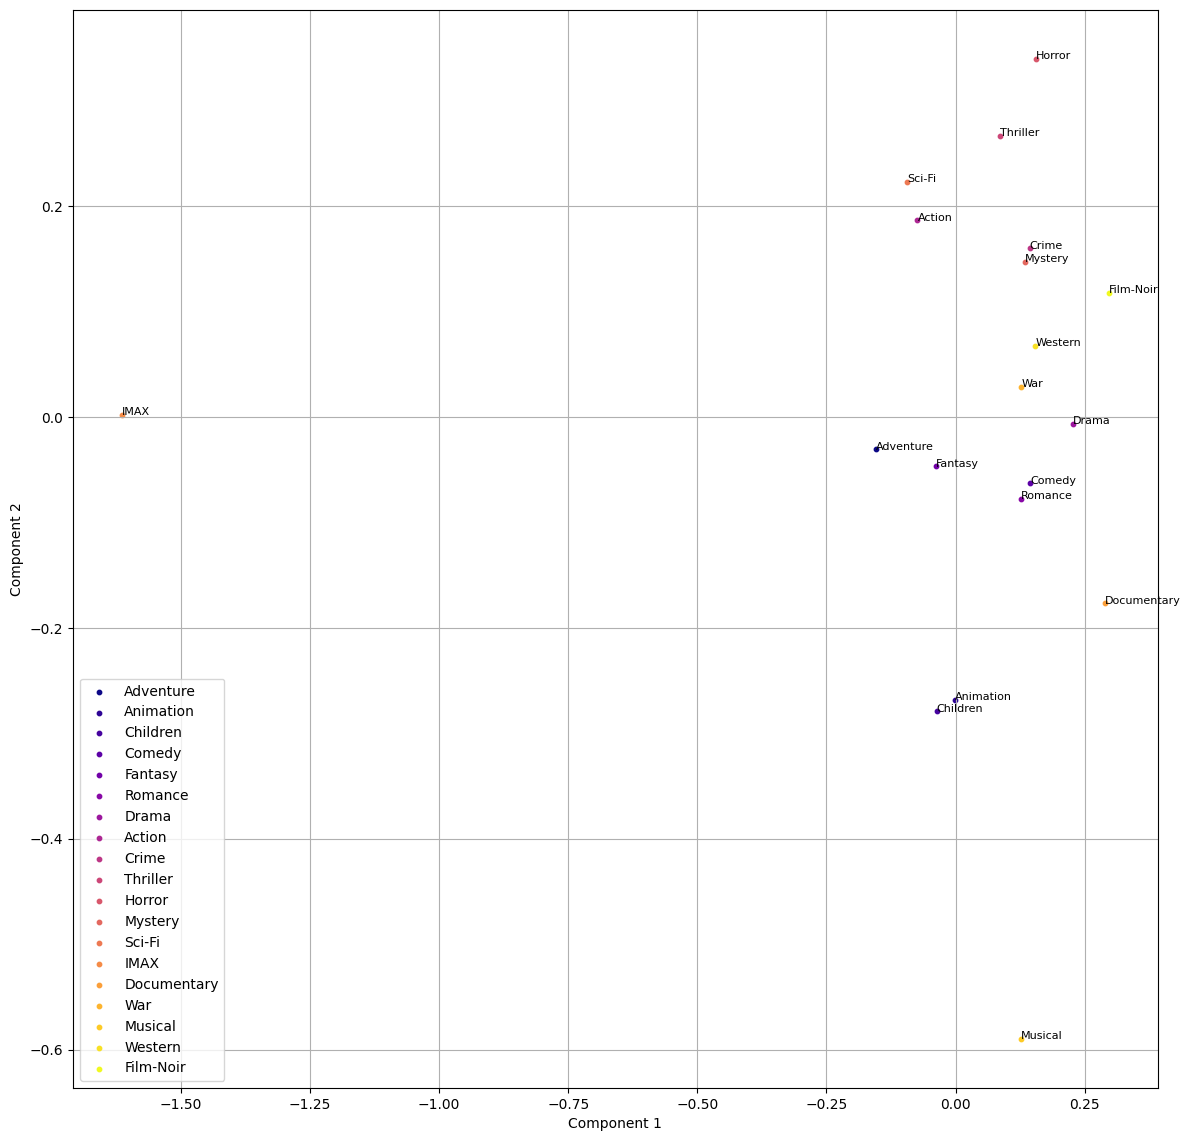

In [19]:
plt.figure(figsize=(14, 14))
# Step 3: Plot movies by genre
for genre_idx, genre in enumerate(genres):
    if genre not in specific_indices:
        print(f"Warning: Genre '{genre}' not found in specific indices. Skipping.")
        continue
    color = colors(genre_idx)
    x, y = reduced_features_embeddings[genre_idx]
    plt.scatter(x, y, color=color, s=10, label=genre if genre not in plt.gca().get_legend_handles_labels()[1] else "")
    # Optional: Add text for each point (e.g., movie title)
    plt.text(x, y,genre, fontsize=8)

# Step 4: Finalize the plot
# plt.title(title)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()

# Using 2D Trained trait Vectors

## Movies Embeddings

In [11]:
experiment_folder = "Experiments_ml-32m/2d_latent_vector/"
data_folder = 'Training_data/ml-32m'
# K_factors = 30; lambda_reg = 1 ; gamma = 0.01 ; taw =  10
user_idx_map, movie_idx_map, idx_to_user, idx_to_movie, genre_to_idx, specific_indices = Load_idx_maps(data_folder)
movies_factors,users_factors,user_bias,item_bias,feature_vectors = load_model(experiment_folder)
# Example genres and their specific indices for the plot
genres = list(specific_indices.keys())  # List of genres

genres = [
 'Children',
 'Horror']
num_genres = len(genres)


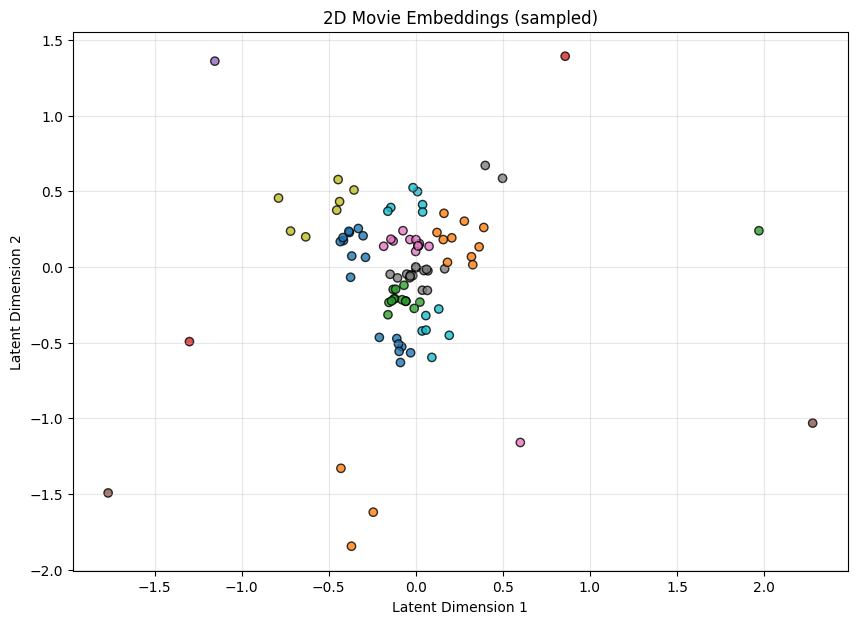

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def plot_movie_embeddings(movies_factors, movies_info=None, n_samples=300, 
                          n_clusters=10, annotate=False):
    """
    Plot a subset of the 2D movie embeddings.

    Parameters
    ----------
    movies_factors : np.ndarray
        Shape (N, 2). The 2D latent trait vectors for N movies.

    movies_info : list of dict or tuple, optional
        Metadata for each movie, e.g. [{'title': 'Movie A', 'genre': 'Comedy'}, ... ].
        Must have length = N (same ordering as movies_factors).
        If None, we skip titles/genres.

    n_samples : int
        How many movies to randomly sample from the entire dataset (e.g. 300).

    n_clusters : int
        Number of clusters to use for color-coding (via k-means).

    annotate : bool
        If True, annotate some points with their titles (be careful not to clutter).

    Returns
    -------
    None, but shows a matplotlib scatter plot.
    """
    N = movies_factors.shape[0]

    if N <= n_samples:
        # If total movies <= n_samples, just plot them all
        sample_indices = np.arange(N)
    else:
        # Otherwise, randomly sample a subset
        sample_indices = np.random.choice(N, size=n_samples, replace=False)

    sampled_vectors = movies_factors[sample_indices]
    
    # -----------------------------
    # 1) Cluster the sampled points
    # -----------------------------
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(sampled_vectors)

    # -----------------------------
    # 2) Create the scatter plot
    # -----------------------------
    plt.figure(figsize=(10, 7))
    
    # We can color by cluster_labels
    plt.scatter(
        sampled_vectors[:, 0],
        sampled_vectors[:, 1],
        c=cluster_labels,
        cmap='tab10',    # or any other qualitative colormap
        alpha=0.8,
        edgecolor='k'
    )
    
    # -----------------------------
    # 3) Optionally annotate titles
    # -----------------------------
    if annotate and movies_info is not None:
        # We won't annotate all points (too cluttered).
        # Let's pick the first n_clusters (one from each cluster).
        # Or pick random from the subset.
        # For simplicity, just pick up to 10 random points to annotate:
        n_to_annotate = min(10, len(sample_indices))
        annotate_indices = np.random.choice(sample_indices, n_to_annotate, replace=False)
        
        for idx in annotate_indices:
            x, y = movies_factors[idx]
            movie_title = movies_info[idx].get('title', f"Movie_{idx}")
            plt.text(
                x, y, 
                movie_title,
                fontsize=8,
                ha='left', 
                va='bottom'
            )

    plt.title("2D Movie Embeddings (sampled)")
    plt.xlabel("Latent Dimension 1")
    plt.ylabel("Latent Dimension 2")
    plt.grid(True, alpha=0.3)
    plt.show()




plot_movie_embeddings(
    movies_factors=movies_factors,

    n_samples=100,          # how many movies to plot
    n_clusters=19,           # how many cluster colors
    annotate=True           # if you want to label some points
)

# This will open a matplotlib figure with a 2D scatter plot.

/tmp/ipykernel_21958/1597781801.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap(colormap, num_genres)


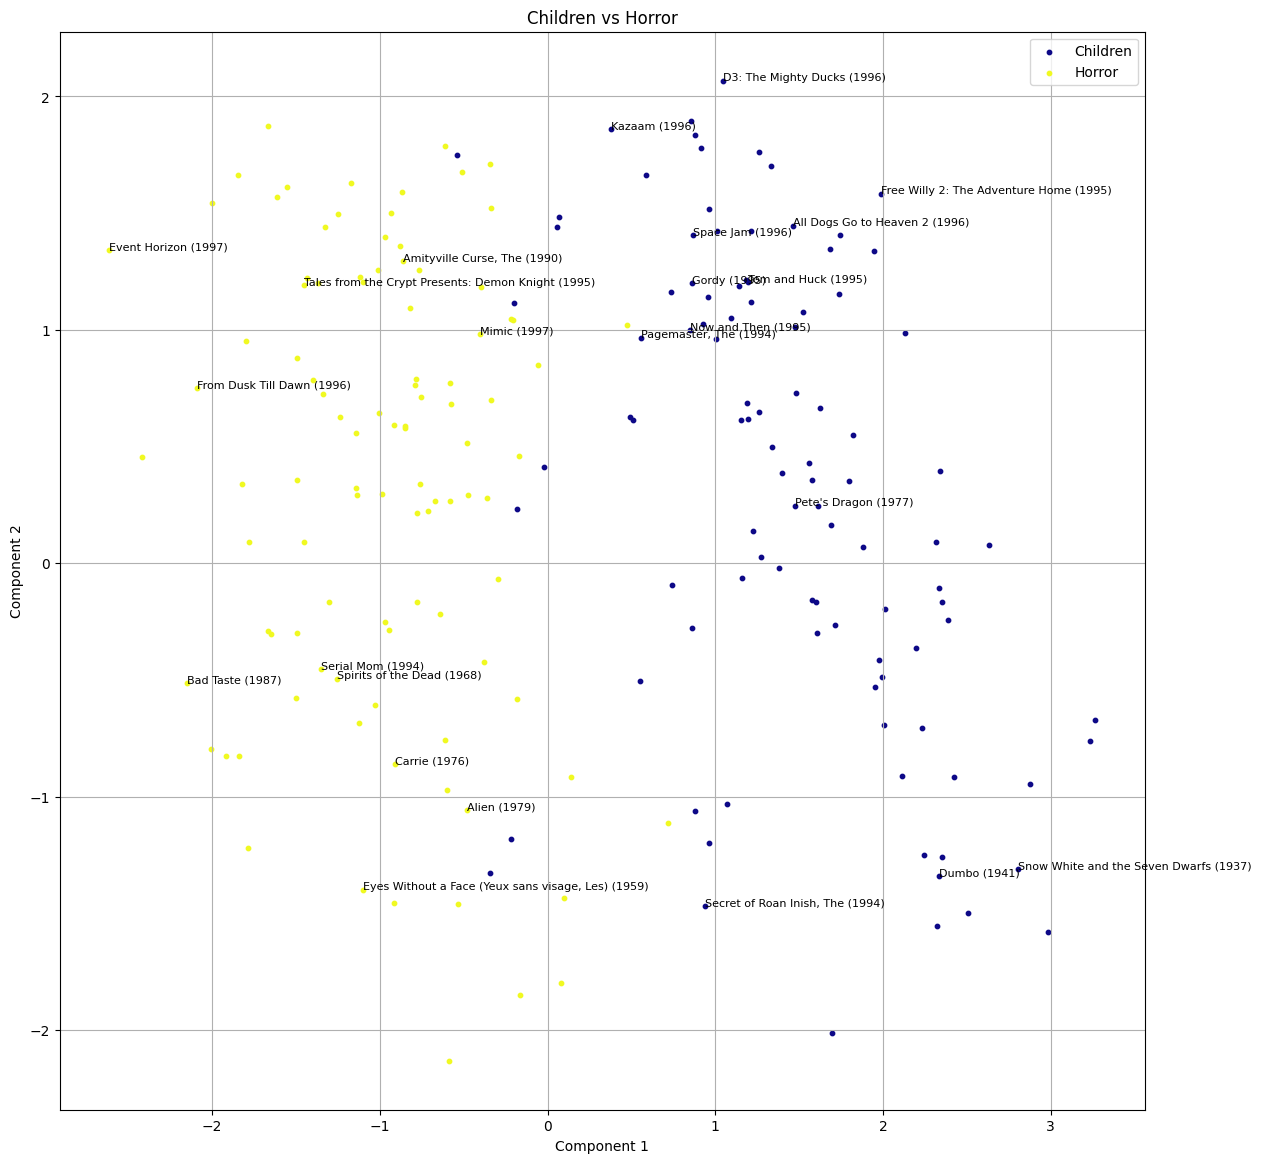

In [31]:
def plot_genre_embeddings(movie_embeddings, specific_indices, genres, colormap='viridis', n_points=100, title="Movie Embeddings Visualization"):
    # Step 2: Setup the plot and colors
    num_genres = len(genres)
    colors = cm.get_cmap(colormap, num_genres)
    plt.figure(figsize=(14, 14))

    # Step 3: Plot movies by genre
    for genre_idx, genre in enumerate(genres):
        if genre not in specific_indices:
            print(f"Warning: Genre '{genre}' not found in specific indices. Skipping.")
            continue
        color = colors(genre_idx)
        for i in specific_indices[genre][:n_points]:
            x, y = movie_embeddings[i]
            plt.scatter(x, y, color=color, s=10, label=genre if genre not in plt.gca().get_legend_handles_labels()[1] else "")
            p = np.random.randint(low=0, high=100, size=1, dtype=int)
            if p < 10 :
                plt.text(x, y,idx_to_title[i], fontsize=8)

    # Step 4: Finalize the plot
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_genre_embeddings(movies_factors, specific_indices, genres=genres, colormap='plasma', n_points=100, title="Children vs Horror")


## Plot Featutes with 2D trait Vector

/tmp/ipykernel_21958/4281944300.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap(colormap, num_genres)


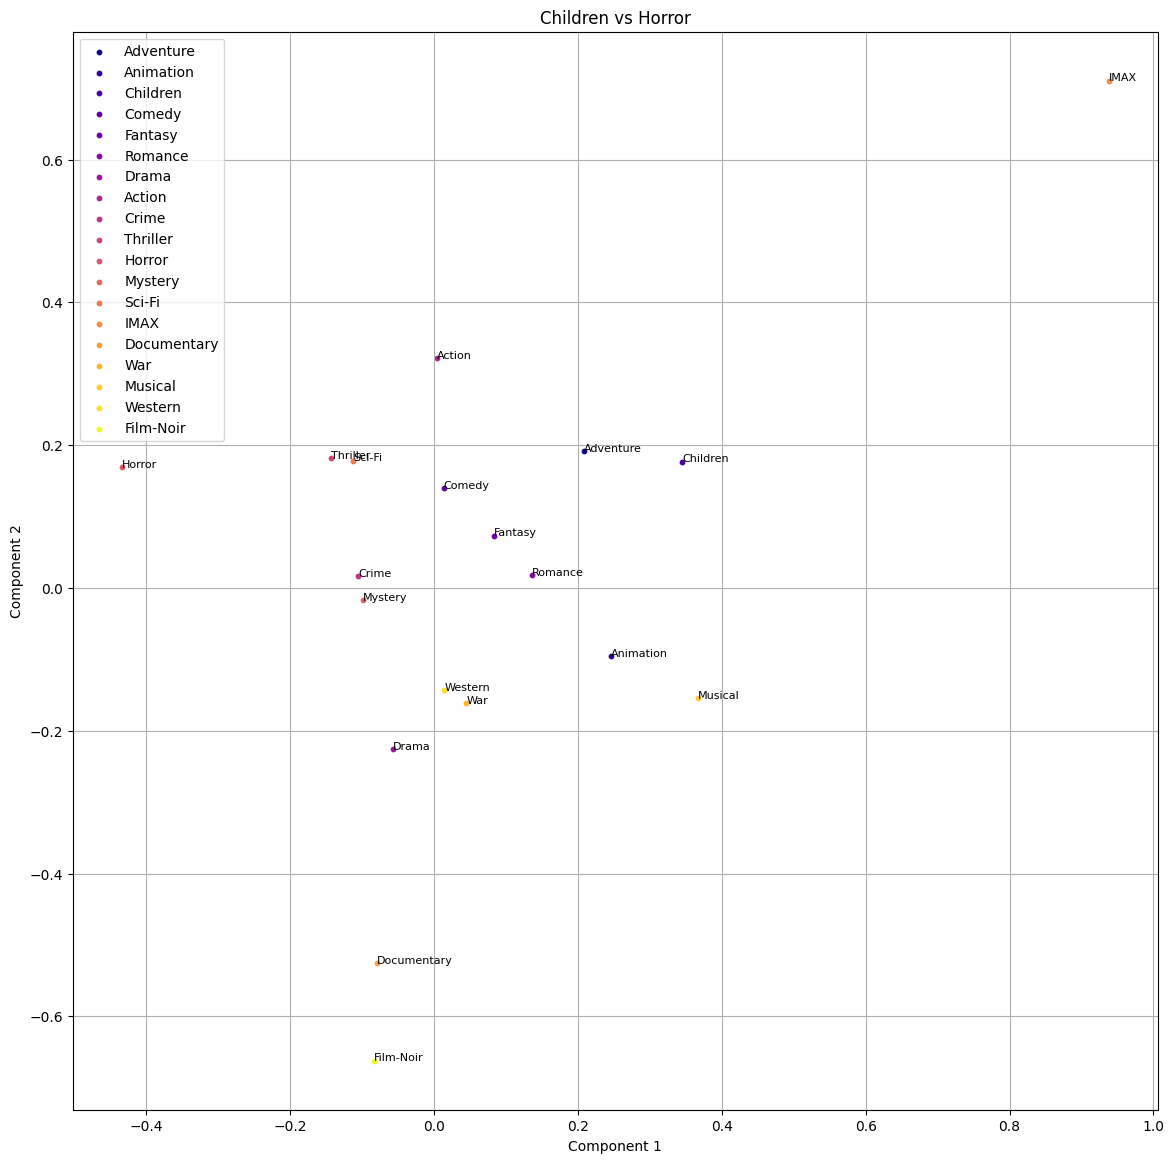

In [38]:
genres = list(specific_indices.keys())  # List of genres

num_genres = len(genres)
def plot_feature_embeddings(feature_vectors, specific_indices, genres, colormap='viridis', n_points=100, title="Movie Embeddings Visualization"):
    # Step 2: Setup the plot and colors
    num_genres = len(genres)
    colors = cm.get_cmap(colormap, num_genres)
    plt.figure(figsize=(14, 14))

    # Step 3: Plot movies by genre
    for genre_idx, genre in enumerate(genres):
        if genre not in specific_indices:
            print(f"Warning: Genre '{genre}' not found in specific indices. Skipping.")
            continue
        color = colors(genre_idx)
        x, y = feature_vectors[genre_idx]
        plt.scatter(x, y, color=color, s=10, label=genre if genre not in plt.gca().get_legend_handles_labels()[1] else "")
        plt.text(x, y,genre, fontsize=8)

    # Step 4: Finalize the plot
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_feature_embeddings(feature_vectors, specific_indices, genres=genres, colormap='plasma', n_points=100, title="Children vs Horror")


/tmp/ipykernel_12083/1709398686.py:51: UserWarning: Mismatched number of handles and labels: len(handles) = 9 len(labels) = 18
  legend1 = plt.legend(


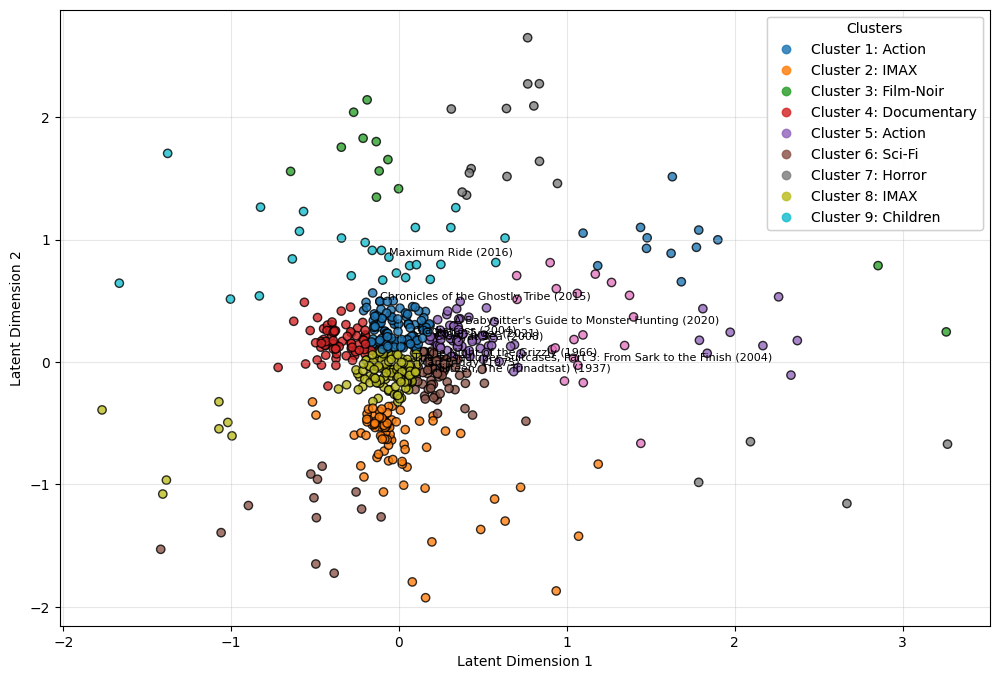

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
from collections import Counter

# Function to plot genre-based clusters of movies
def plot_genre_clusters(movies_factors, specific_indices, idx_to_movie, n_per_genre=50, n_clusters=18, annotate=False):

    sampled_vectors = []
    sampled_labels = []
    sampled_titles = []

    # Sample movies from each genre
    for genre, indices in specific_indices.items():
        # Randomly sample up to n_per_genre movies from this genre
        sampled_indices = random.sample(indices, min(n_per_genre, len(indices)))
        sampled_vectors.extend(movies_factors[sampled_indices])
        sampled_labels.extend([genre] * len(sampled_indices))
        sampled_titles.extend([idx_to_movie[idx] for idx in sampled_indices])

    # Convert to NumPy arrays
    sampled_vectors = np.array(sampled_vectors)
    sampled_labels = np.array(sampled_labels)

    # Perform clustering on the sampled data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(sampled_vectors)

    # Determine the most occurring genre for each cluster
    cluster_genre_map = {}
    for cluster in range(n_clusters):
        cluster_indices = np.where(cluster_labels == cluster)[0]
        cluster_genres = [sampled_labels[idx] for idx in cluster_indices]
        most_common_genre = Counter(cluster_genres).most_common(1)[0][0]
        cluster_genre_map[cluster] = most_common_genre

    # Create scatter plot
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        sampled_vectors[:, 0], 
        sampled_vectors[:, 1], 
        c=cluster_labels, 
        cmap='tab10', 
        alpha=0.8, 
        edgecolor='k'
    )

    # Add legend for clusters with corresponding genres
    legend_labels = [f'Cluster {i+1}: {cluster_genre_map[i]}' for i in range(n_clusters)]
    legend1 = plt.legend(
        handles=scatter.legend_elements()[0], 
        labels=legend_labels,
        title="Clusters",
        loc="upper right"
    )
    plt.gca().add_artist(legend1)

    # Optionally annotate a few points
    if annotate:
        for i in range(10):
            plt.text(
                sampled_vectors[i, 0], 
                sampled_vectors[i, 1], 
                sampled_titles[i], 
                fontsize=8, 
                ha='left', 
                va='bottom'
            )

    # plt.title("2D Movie Embeddings with Clusters")
    plt.xlabel("Latent Dimension 1")
    plt.ylabel("Latent Dimension 2")
    plt.grid(True, alpha=0.3)
    plt.savefig("2DV_EMBED.pdf")
    plt.show()

# Example usage
experiment_folder = "Experiments_ml-32m/2d_latent_vector/"
data_folder = 'Training_data/ml-32m'

# Load data and model
user_idx_map, movie_idx_map, idx_to_user, idx_to_movie, genre_to_idx, specific_indices = Load_idx_maps(data_folder)
movies_factors, users_factors, user_bias, item_bias, feature_vectors = load_model(experiment_folder)

# Plot the movie embeddings
plot_genre_clusters(
    movies_factors=movies_factors, 
    specific_indices=specific_indices, 
    idx_to_movie=idx_to_title, 
    n_per_genre=35,  # Sample 10 movies per genre
    n_clusters=18,    # Cluster into 19 groups
    annotate=True    # Annotate some points for clarity
)